# Guided Capstone Step 6 Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score,mean_absolute_error
from sklearn.model_selection import train_test_split

print(os.getcwd())

df = pd.read_csv('../data/step3_output.csv')
df.drop(df.columns[[0,1]],axis=1, inplace=True)

C:\Users\jeffk\OneDrive\Springboard\GuidedCapstone\notebooks


## Fit Models with Training Data Set

**<font color='teal'> Using sklearn fit the model you cose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [2]:
outputColumns = ['AdultWeekend','AdultWeekday','projectedDaysOpen', 'daysOpenLastYear',]
unusedColumns = ['Name', 'summit_elev','base_elev', 'state', 'kmeans' ]
print(unusedColumns + outputColumns)

Input = df.drop( unusedColumns + outputColumns , axis=1)
Output = df[outputColumns]

X_train, X_test, y_train, y_test = train_test_split(Input, Output, test_size=0.25, random_state=25)

steps = [
    ('scale', StandardScaler()),
    ('estimator', LinearRegression())
]
model3 = Pipeline(steps)
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)

print('Interecpt:' , model3.named_steps['estimator'].intercept_, '\n')
coefficients = dict(zip(X_test.columns.tolist(), model3.named_steps['estimator'].coef_[0]))
for key, value in sorted(coefficients.items(),key=lambda item: abs(item[1]), reverse = True):
    print ('%s : %s' % (key, coefficients[key]))

model_3_scores = (explained_variance_score(y_test,y_pred),mean_absolute_error(y_test,y_pred, multioutput='raw_values')[0])

['Name', 'summit_elev', 'base_elev', 'state', 'kmeans', 'AdultWeekend', 'AdultWeekday', 'projectedDaysOpen', 'daysOpenLastYear']
Interecpt: [ 64.78497482  58.75614681 120.35228394 115.01194259] 

fastQuads : 9.54598716225511
SkiableTerrain_ac : -6.999846104542714
Runs : 5.875464636402548
vertical_drop : 5.8059504928367955
quad : 4.261084055336437
surface : -3.9938456871508277
fastEight : -2.6320360423210643
total_chairs : 2.485090970678938
trams : -2.3839846769137063
triple : 2.0345120670185244
double : 1.6922794940467314
averageSnowfall : 1.5590821629389287
fastSixes : 1.2863384862771543
LongestRun_mi : 1.2030652141837908
Snow Making_ac : -1.1448588251607152
NightSkiing_ac : 0.7491056540364434
yearsOpen : -0.4939674604864326
TerrainParks : -0.04919959501044707


## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [106]:
whitefish_index = df[df.Name == 'Whitefish Mountain Resort'].index.tolist()
BigMountain_features = Input.iloc[whitefish_index]
BigMountain_target = Output.iloc[whitefish_index]   

**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [4]:
model3_output = model3.predict(BigMountain_features)

**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [5]:
print('AdultWeekend predicted', model3_output[0][0])

AdultWeekend predicted 89.52036895173944


**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [6]:
print('AdultWeekend actual: ' , BigMountain_target.iat[0,0])

AdultWeekend actual:  81.0


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

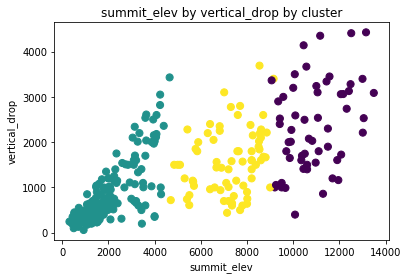

<Figure size 432x288 with 0 Axes>

In [7]:
plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['kmeans'], s=50, cmap='viridis', label ='clusters')
#plt.scatter(df['summit_elev'], df['vertical_drop'], c='black', s=100)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.show()
plt.savefig('../figures/fig1.png',bbox_inches='tight')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and python scripts you have created and clean them n=up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model out a callable object using pickle for future use in a data pipeline.**<font color='teal'> Run the example code below to save out your callable model, notice we save it in the models folder we created in our previous guided capstone.</font>** 

In [8]:
import pickle
s = pickle.dumps(model3)
from joblib import dump, load
dump(model3, '../models/regression_model_adultweekend.joblib') 

['../models/regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file then upload it to your github repository.</font>** 

Assemble a dataframe with the necessary information to reproduce the model output by hand calculations. It will contain  the following rows: 
1. BigMountain_features
2. scale mean
3. BigMountain_features - scale mean
4. scale standard deviation
5. standardized features
6. model coefficients


In [148]:
row_names = BigMountain_features.columns.tolist()
BigMountain_data = BigMountain_features.iloc[0].tolist()
col_names = ['value','BigMountain']
d = {'value':row_names, 'BigMountain':BigMountain_data}

print(len(model3.named_steps['estimator'].coef_))

manual_model = pd.DataFrame()
manual_model['feature'] = row_names
manual_model['BgMtn'] = BigMountain_data
manual_model['mean'] = model3.named_steps['scale'].mean_
manual_model['BgMtn-mean'] = manual_model['BgMtn'] - manual_model['mean']
manual_model['stdev'] = pow(model3.named_steps['scale'].var_,0.5)
manual_model['BgMtnFeat'] = manual_model['BgMtn-mean'] / manual_model['stdev']
manual_model['$/feat'] = model3.named_steps['estimator'].coef_[0,:]
manual_model['BgMtnValue'] = manual_model['BgMtnFeat'] * manual_model['$/feat']
print(manual_model.round(3))
print('\nModel intercept (lift ticket price of a hypothetical resort having all features equal to the mean): $%s' % round(model3.named_steps['estimator'].intercept_[0],2) )
print('Added value of all Big Mountain features $%s' % round(manual_model['BgMtnValue'].sum(),2))
print('Market lift ticket value for all Big Mountain features $%s' % round(manual_model['BgMtnValue'].sum() + model3.named_steps['estimator'].intercept_[0],2))

4
              feature   BgMtn      mean  BgMtn-mean     stdev  BgMtnFeat  \
0       vertical_drop  2353.0  1251.571    1101.429   964.458      1.142   
1               trams     0.0     0.174      -0.174     0.567     -0.307   
2           fastEight     0.0     0.004      -0.004     0.063     -0.064   
3           fastSixes     0.0     0.202      -0.202     0.673     -0.301   
4           fastQuads     3.0     1.073       1.927     2.236      0.862   
5                quad     2.0     0.879       1.121     1.279      0.876   
6              triple     6.0     1.510       4.490     1.693      2.652   
7              double     0.0     1.891      -1.891     1.681     -1.125   
8             surface     3.0     2.656       0.344     2.129      0.162   
9        total_chairs    14.0     7.105       6.895     3.371      2.045   
10               Runs   105.0    49.966      55.034    48.784      1.128   
11       TerrainParks     4.0     2.356       1.644     2.043      0.805   
12      Lo

In [156]:
print('Features sorted by $/feature:\n')
print(manual_model[['feature','BgMtnFeat','$/feat','BgMtnValue']].sort_values('$/feat', ascending=False).round(2))

Features sorted by $/feature:

              feature  BgMtnFeat  $/feat  BgMtnValue
4           fastQuads       0.86    9.55        8.23
10               Runs       1.13    5.88        6.63
0       vertical_drop       1.14    5.81        6.63
5                quad       0.88    4.26        3.73
9        total_chairs       2.05    2.49        5.08
6              triple       2.65    2.03        5.40
7              double      -1.12    1.69       -1.90
16    averageSnowfall       1.07    1.56        1.67
3           fastSixes      -0.30    1.29       -0.39
12      LongestRun_mi       1.55    1.20        1.87
17     NightSkiing_ac       5.27    0.75        3.95
11       TerrainParks       0.80   -0.05       -0.04
15          yearsOpen       0.83   -0.49       -0.41
14     Snow Making_ac       1.65   -1.14       -1.89
1               trams      -0.31   -2.38        0.73
2           fastEight      -0.06   -2.63        0.17
8             surface       0.16   -3.99       -0.65
13  SkiableTerr